In [2]:
using JLD2, LinearAlgebra, Makie, CairoMakie

include("../../MyTwoLayerNN/MyTwoLayerNN.jl")
include("../experimentplots.jl")

using .MyTwoLayerNN

In [3]:
include("../experimentplots.jl")

createorientiationplot (generic function with 1 method)

In [4]:
function showNN(file::String)
    experiment = load(file)
    
    f = Figure()
    ax = Axis(f[1, 1])
    createlineplot!(ax, experiment["trainedNN"], experiment["trainingData"])

    display(f)

    return nothing
end

showNN (generic function with 1 method)

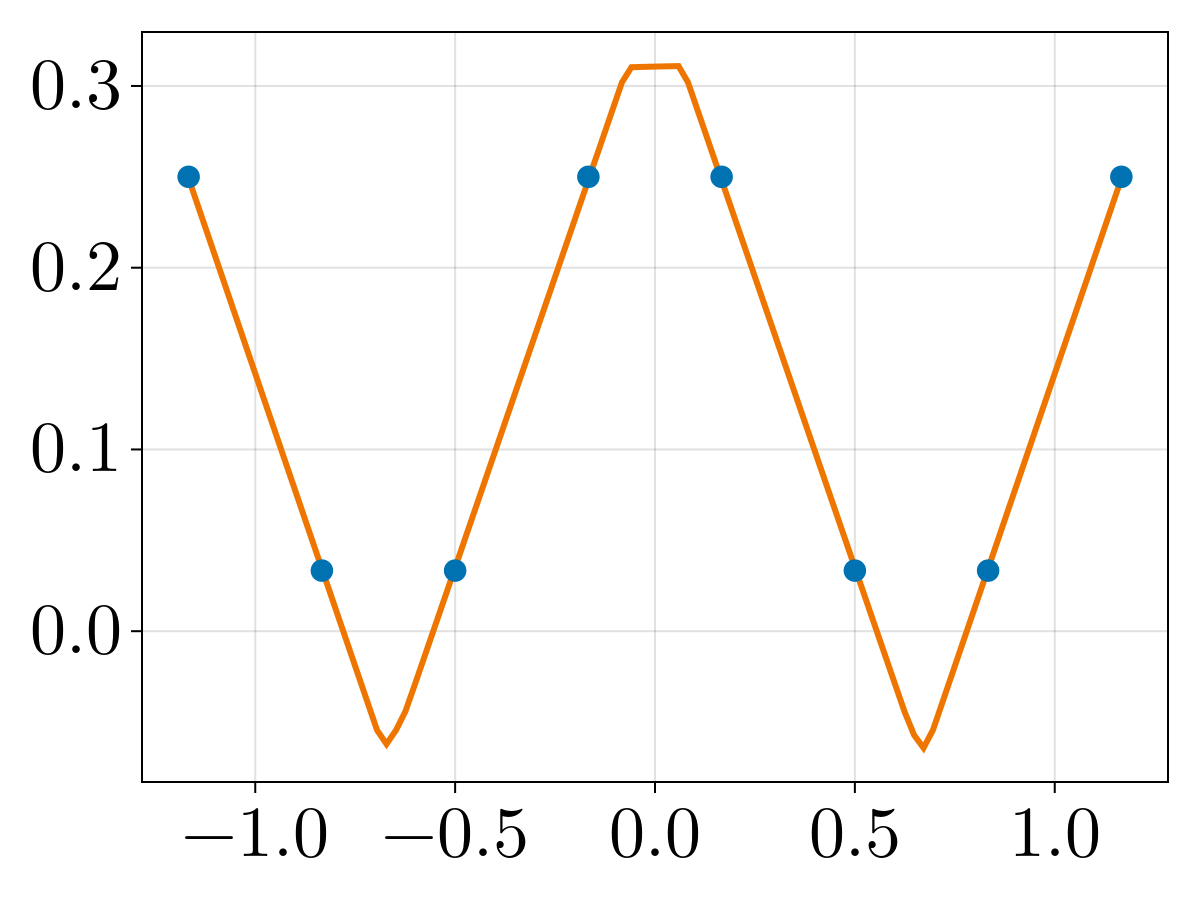

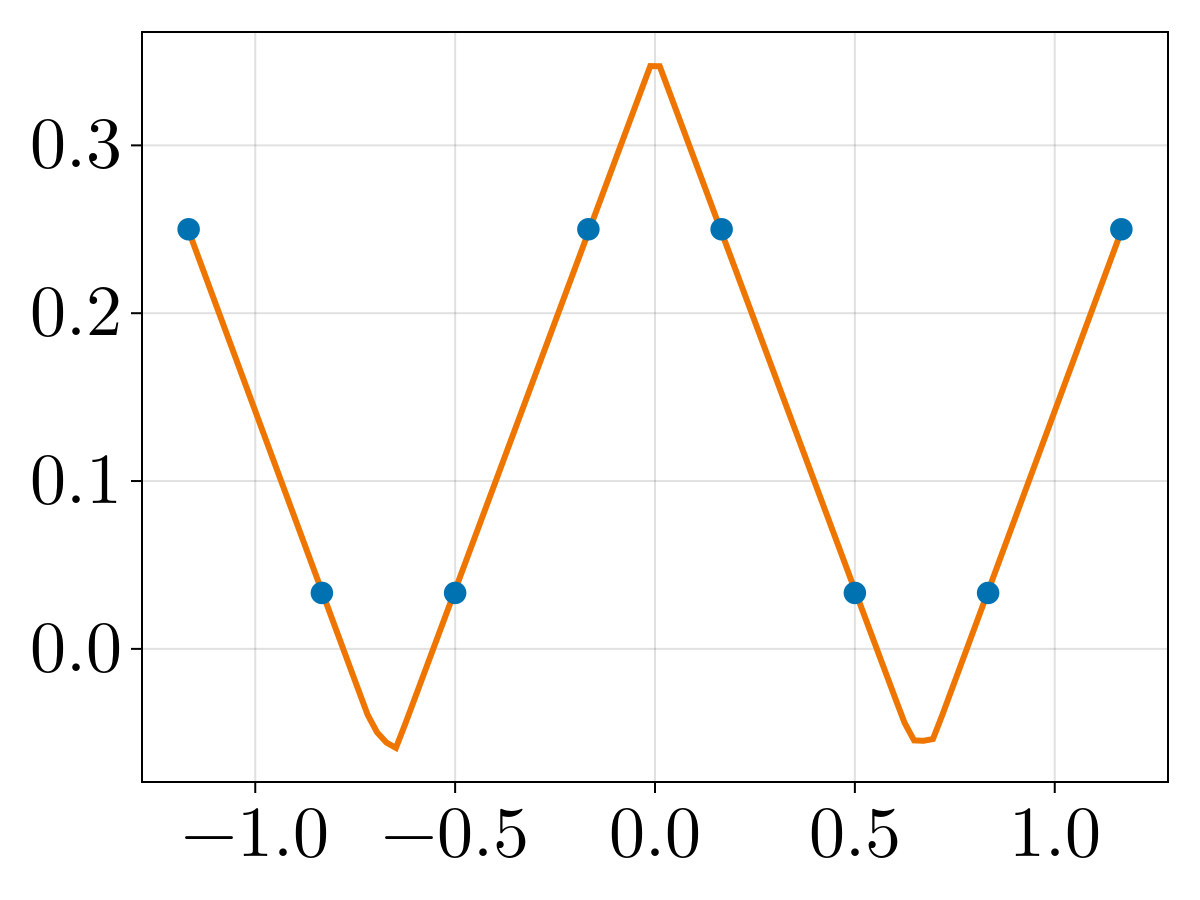

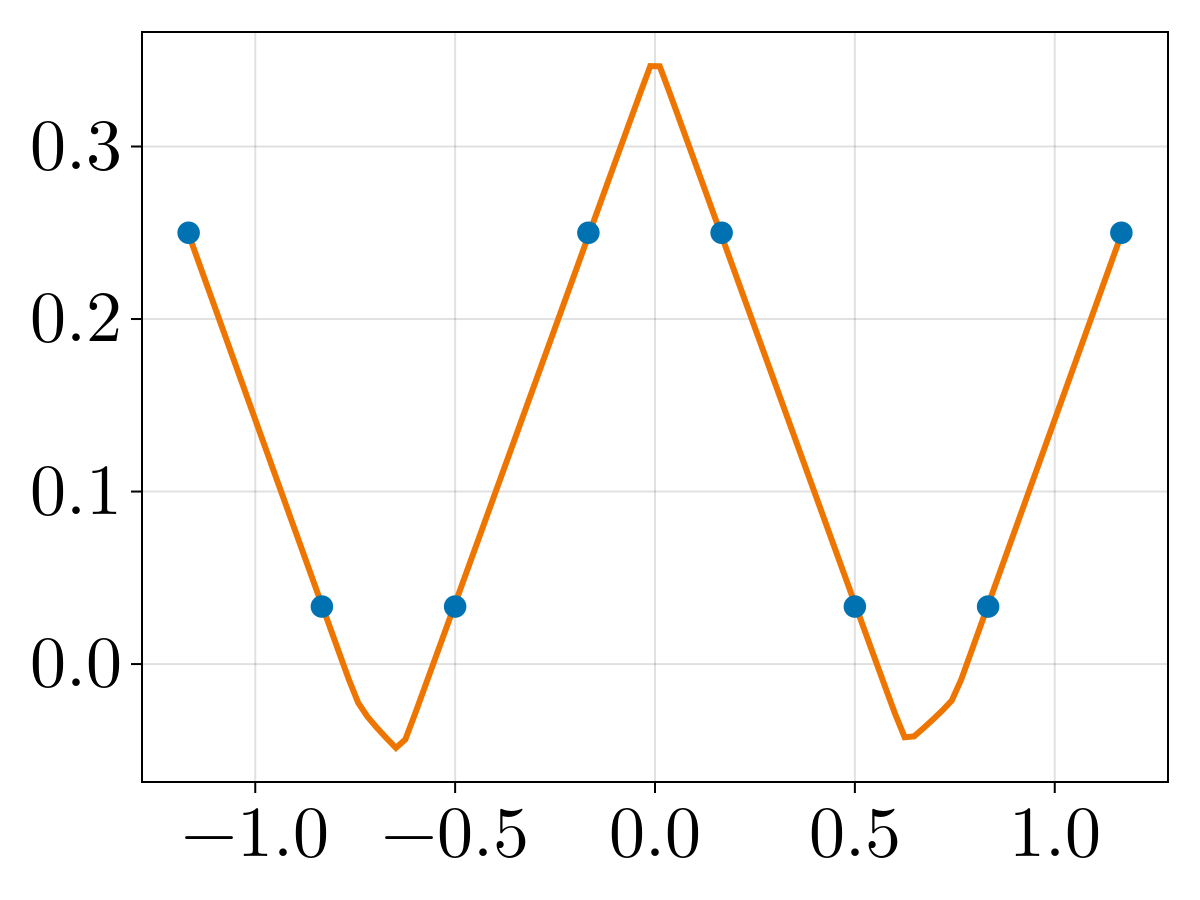

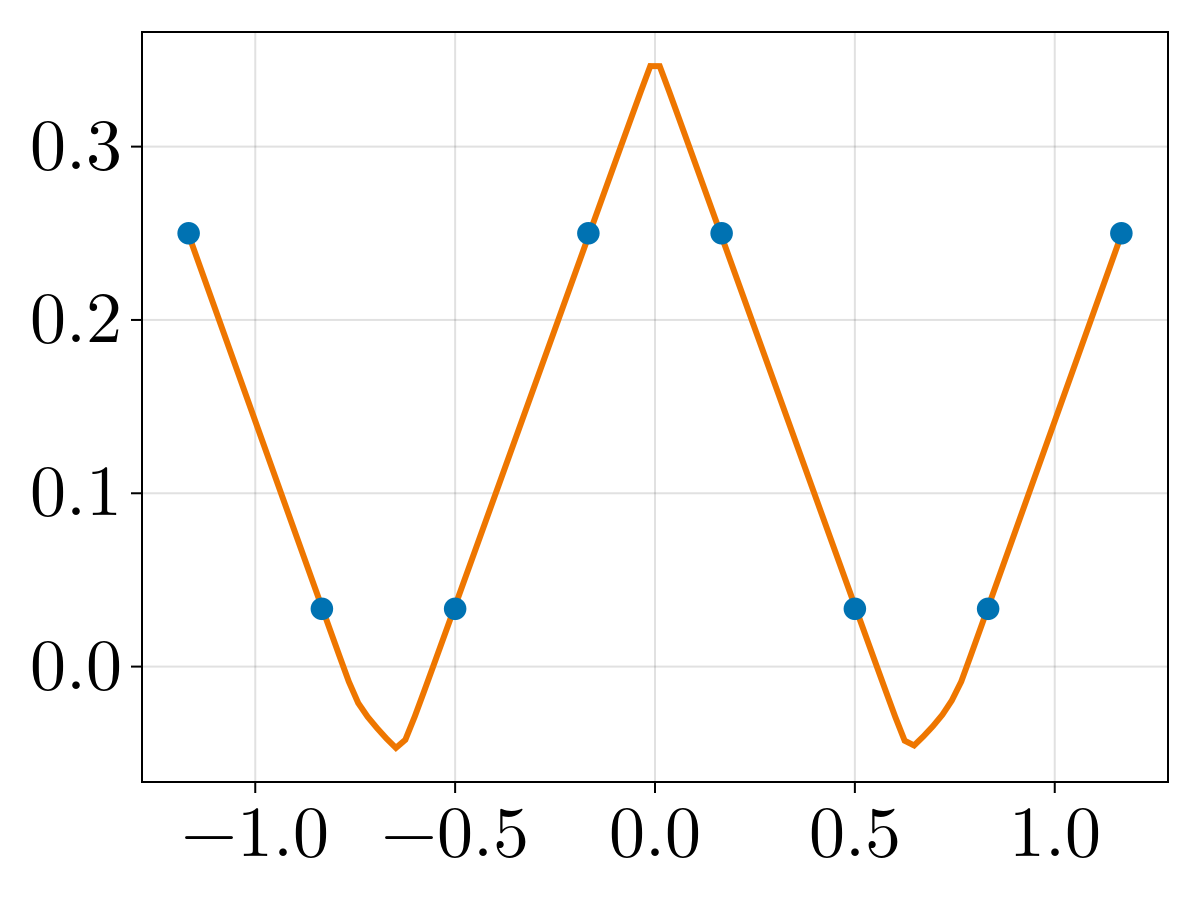

In [67]:
folder_name = "repeated data/"

showNN(folder_name * "run c=0.0.jld2")
showNN(folder_name * "run c=0.5.jld2")
showNN(folder_name * "run c=0.9.jld2")
showNN(folder_name * "run c=0.95.jld2")
# showNN(folder_name * "run c=0.99.jld2")

## Images relation orientation with inflection point

In [3]:
experiment_data = load("normal data/run c=0.0.jld2")
initNN = experiment_data["initNN"]
trainedNN = experiment_data["trainedNN"]
trainingData = experiment_data["trainingData"]

TrainingData{Float64, Int64}([[-0.5], [-0.16666666666666666], [0.16666666666666666], [0.5]], [0.25, 0.03333333333333333, 0.03333333333333333, 0.25], 1000.0, 100000000)

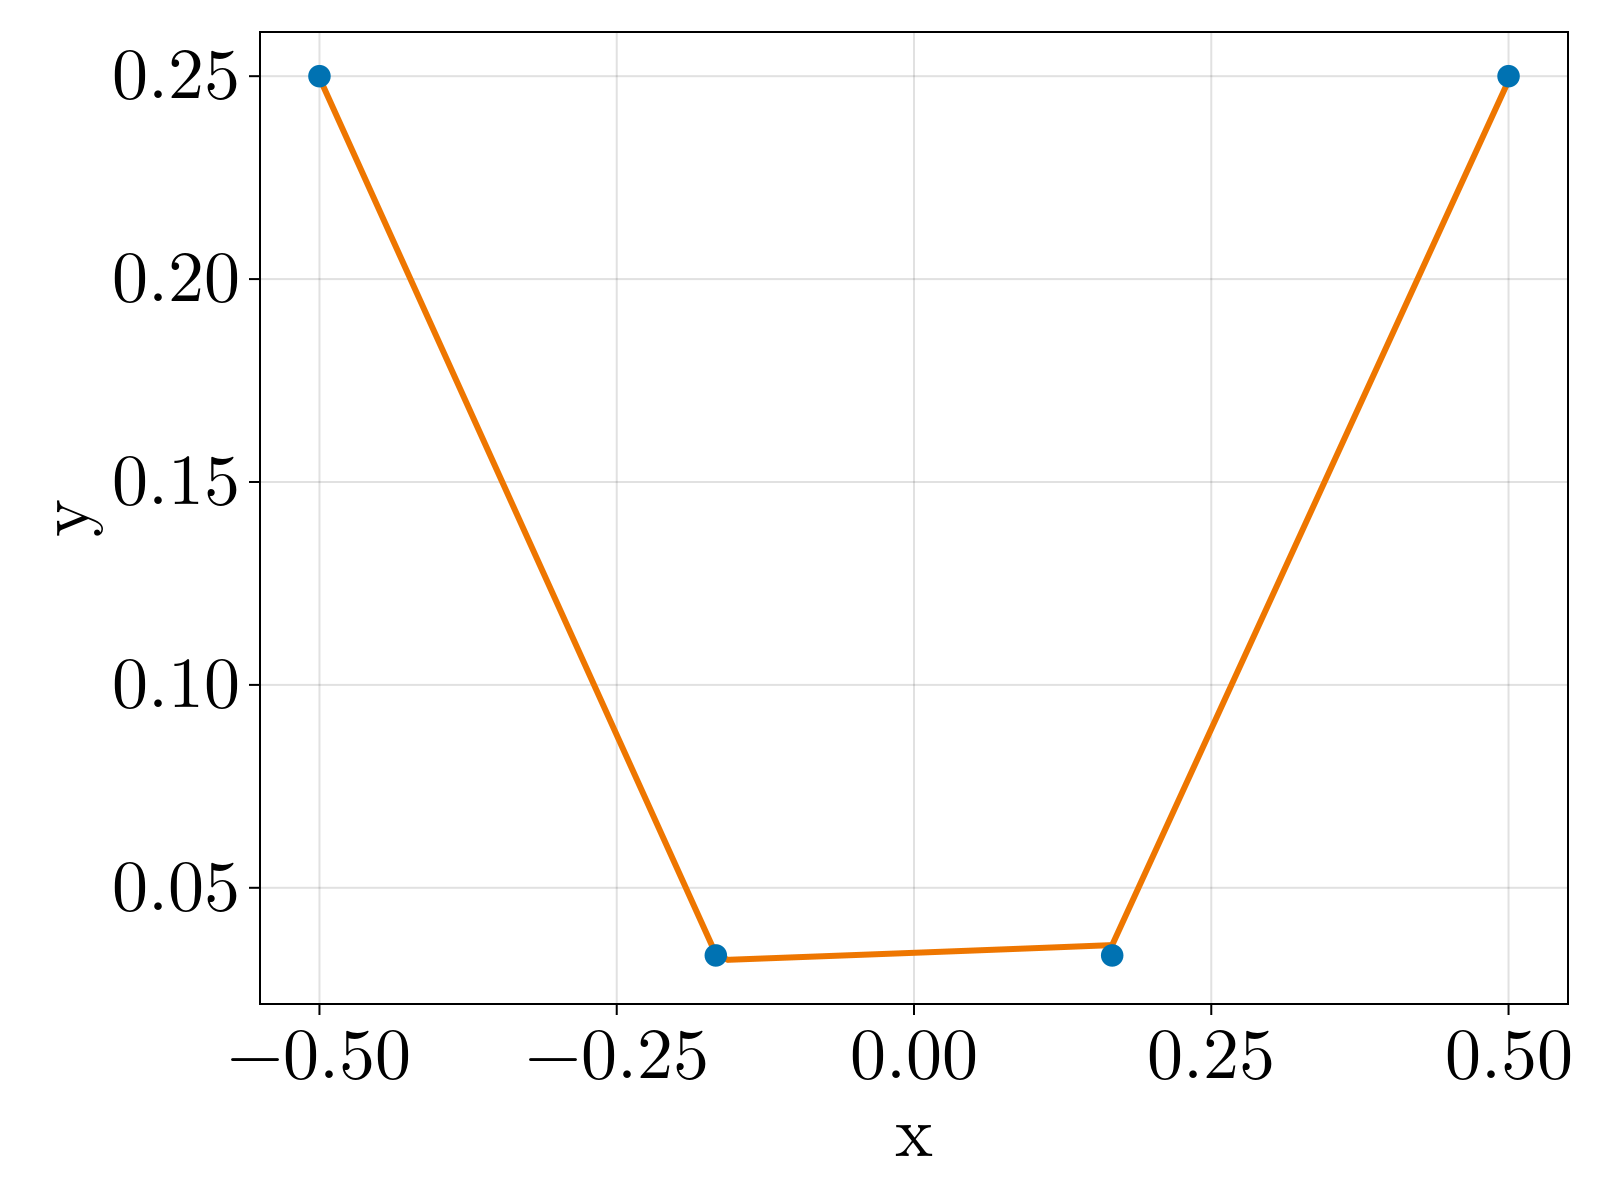

In [46]:
f = Figure(size=(800, 600))
ax = Axis(f[1, 1], xticks=-0.5:0.25:0.5, xlabel = "x", ylabel = "y")
createlineplot!(ax, trainedNN, trainingData)

save("standard condensed nn.pdf", f)
f

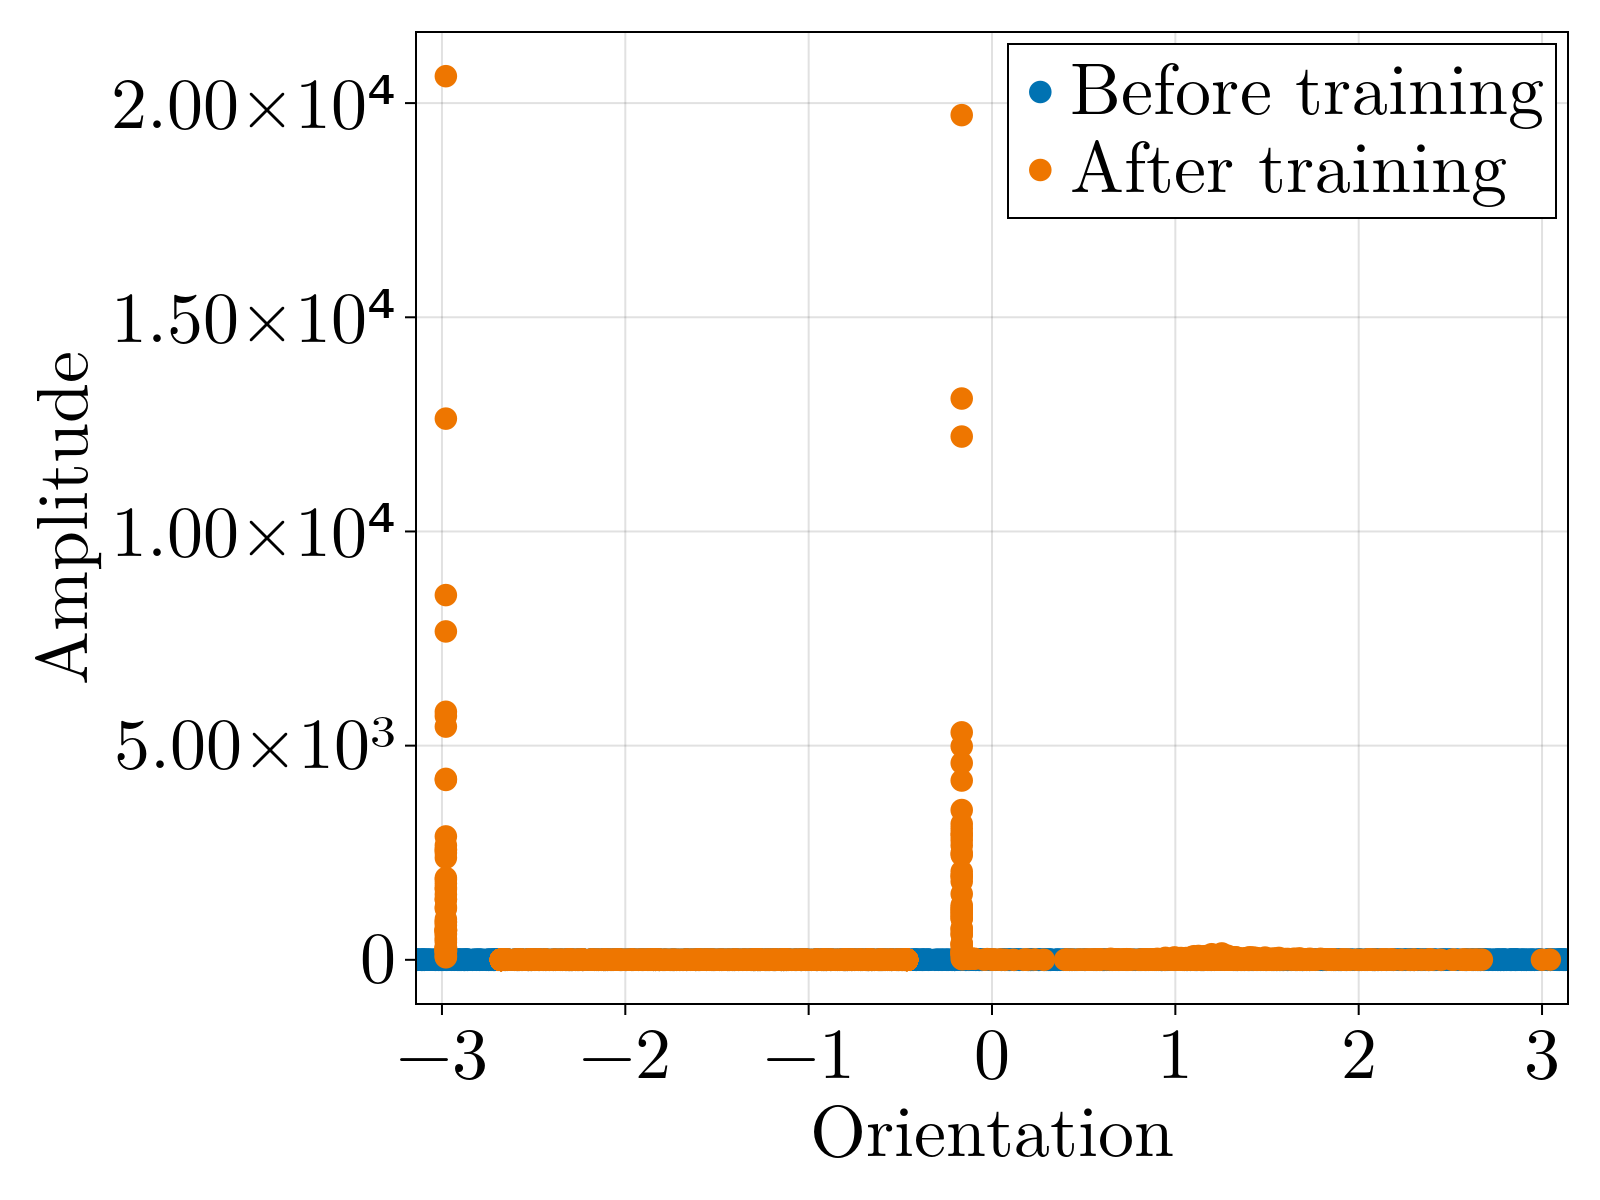

In [44]:
f = Figure(size=(800, 600))
ax = Axis(f[1, 1], xticks=-3:1:3)
createorientiationplot!(ax, initNN, trainedNN)

save("standard condensed orientation.pdf", f)
f

In [43]:
function inflectionpoint_plot!(ax::Axis, nni, nnt)
    # Set axis labels
    ax.xlabel = L"-b/w"
    ax.ylabel = "Amplitude"
    
    # Calculate amplitude
    amp_initial = abs.(nni.a) .* norm.(eachrow([nni.w nni.b]))
    amp_trained = abs.(nnt.a) .* norm.(eachrow([nnt.w nnt.b]))
    
    # Calculate orientation
    ori_initial = -1 .* nni.b ./ nni.w |> vec
    ori_trained = -1 .* nnt.b ./ nnt.w |> vec
    
    # Plot all points
    scat_init = scatter!(ax, ori_initial, amp_initial, markersize=16)
    scat_trained = scatter!(ax, ori_trained, amp_trained, markersize=16, color=:darkorange2)
    
    axislegend(ax, [scat_init, scat_trained], ["Before training", "After training"])
end

inflectionpoint_plot! (generic function with 1 method)

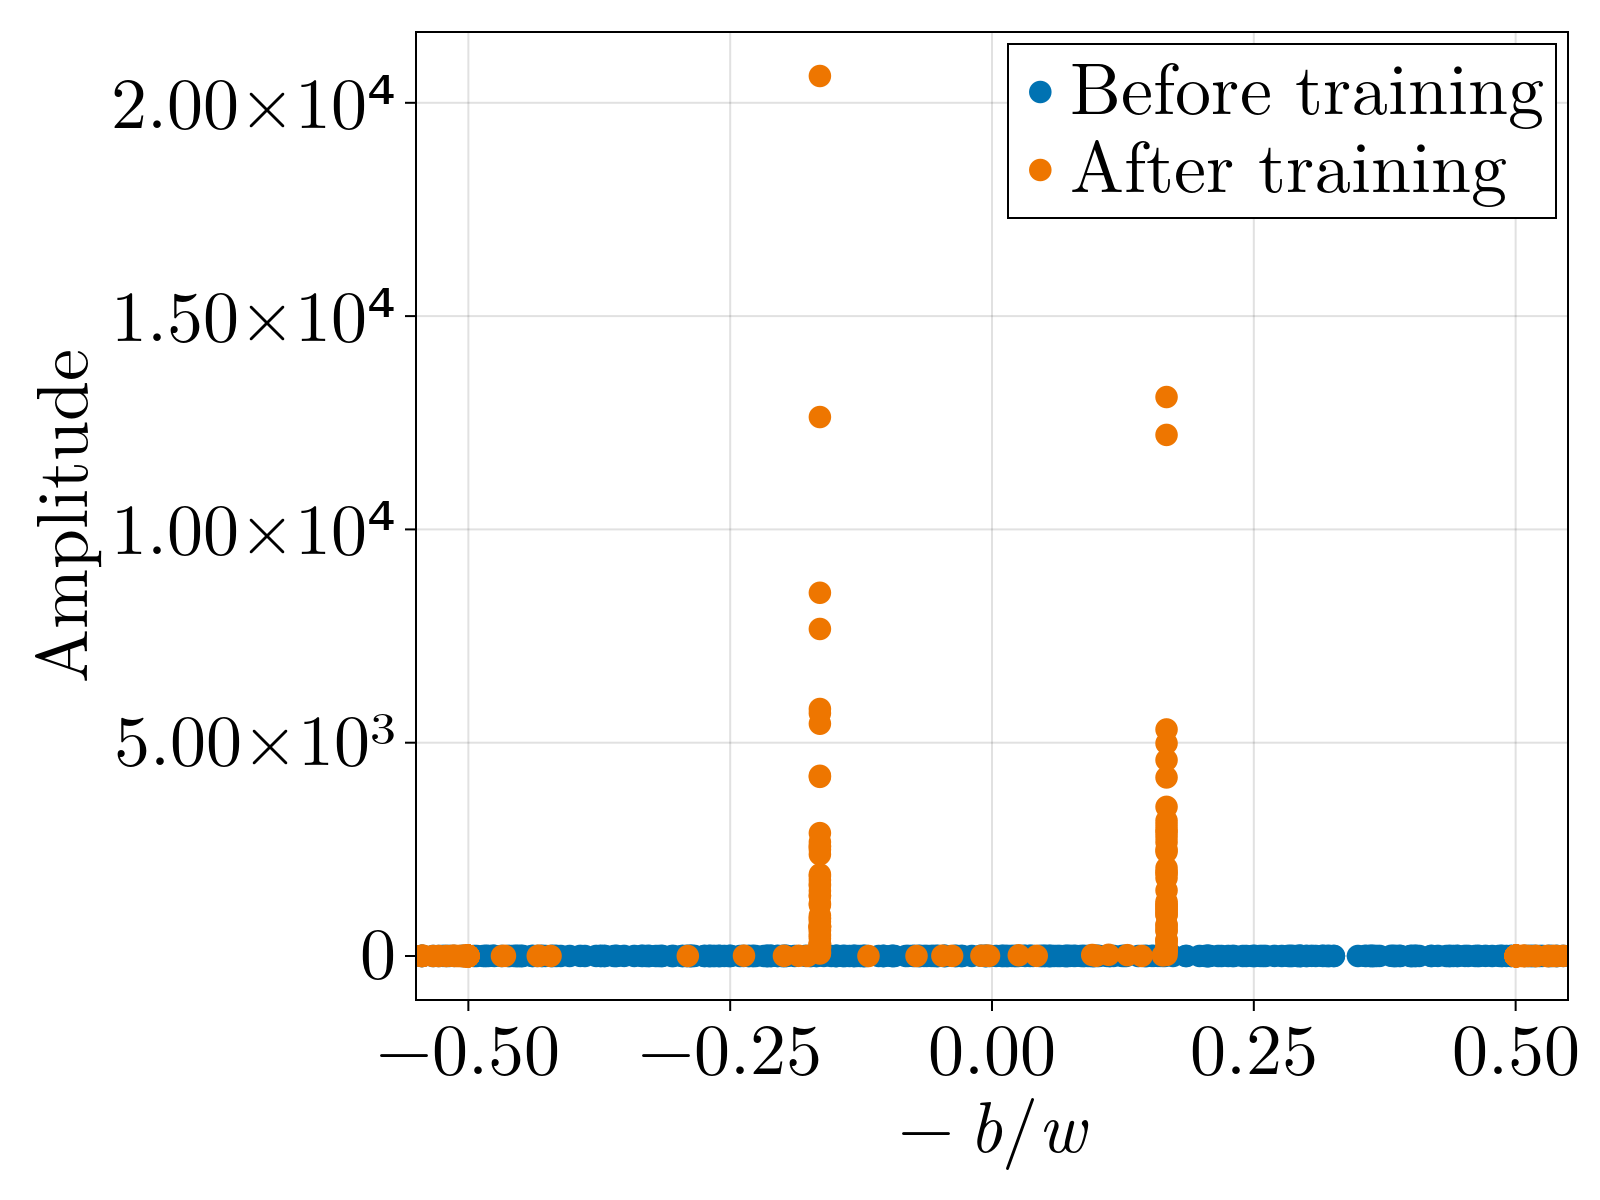

In [50]:
f = Figure(size=(800, 600))
ax = Axis(f[1, 1], xticks=-0.5:0.25:0.5)
xlims!(ax, -0.55, 0.55)

inflectionpoint_plot!(ax, initNN, trainedNN)

save("standard condensed inflection.pdf", f)
f

## Test

In [68]:
experiment_data = load("normal data/run c=0.0.jld2")
initNN = experiment_data["initNN"]
trainedNN = experiment_data["trainedNN"]
trainingData = experiment_data["trainingData"]

TrainingData{Float64, Int64}([[-0.5], [-0.16666666666666666], [0.16666666666666666], [0.5]], [0.25, 0.03333333333333333, 0.03333333333333333, 0.25], 1000.0, 100000000)

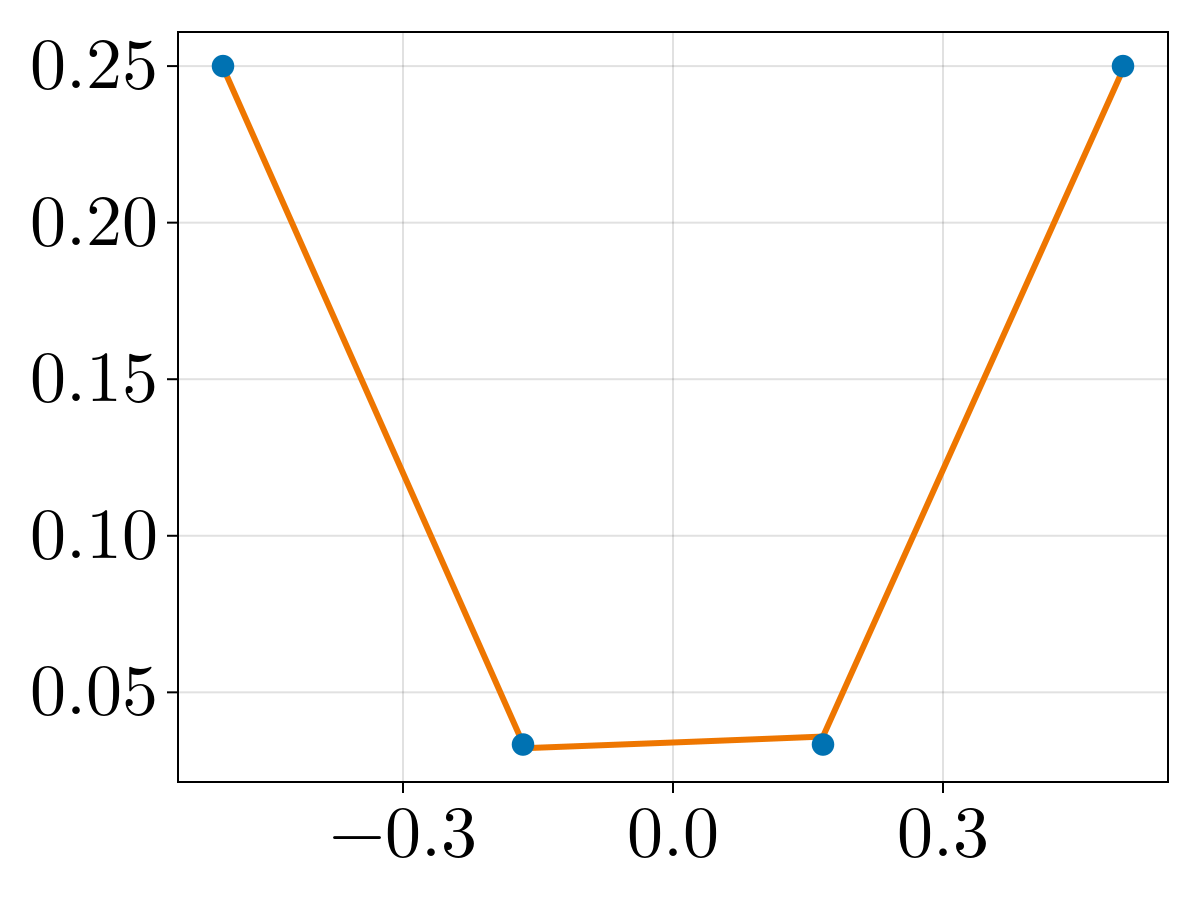

In [83]:
f = Figure()
ax = Axis(f[1, 1])
createlineplot!(ax, trainedNN, trainingData)
# createorientiationplot!(ax, initNN, trainedNN)
# inflectionpoint_plot!(ax, initNN, trainedNN)

f

In [73]:
sum(-0.5 .< -trainedNN.b ./ trainedNN.w .< 0.5) |> println # Neurons with inflection points outside the range
amplitudes = abs.(trainedNN.a) .* norm.(eachrow([trainedNN.w trainedNN.b]))
sum(amplitudes .< 100) 

120


906

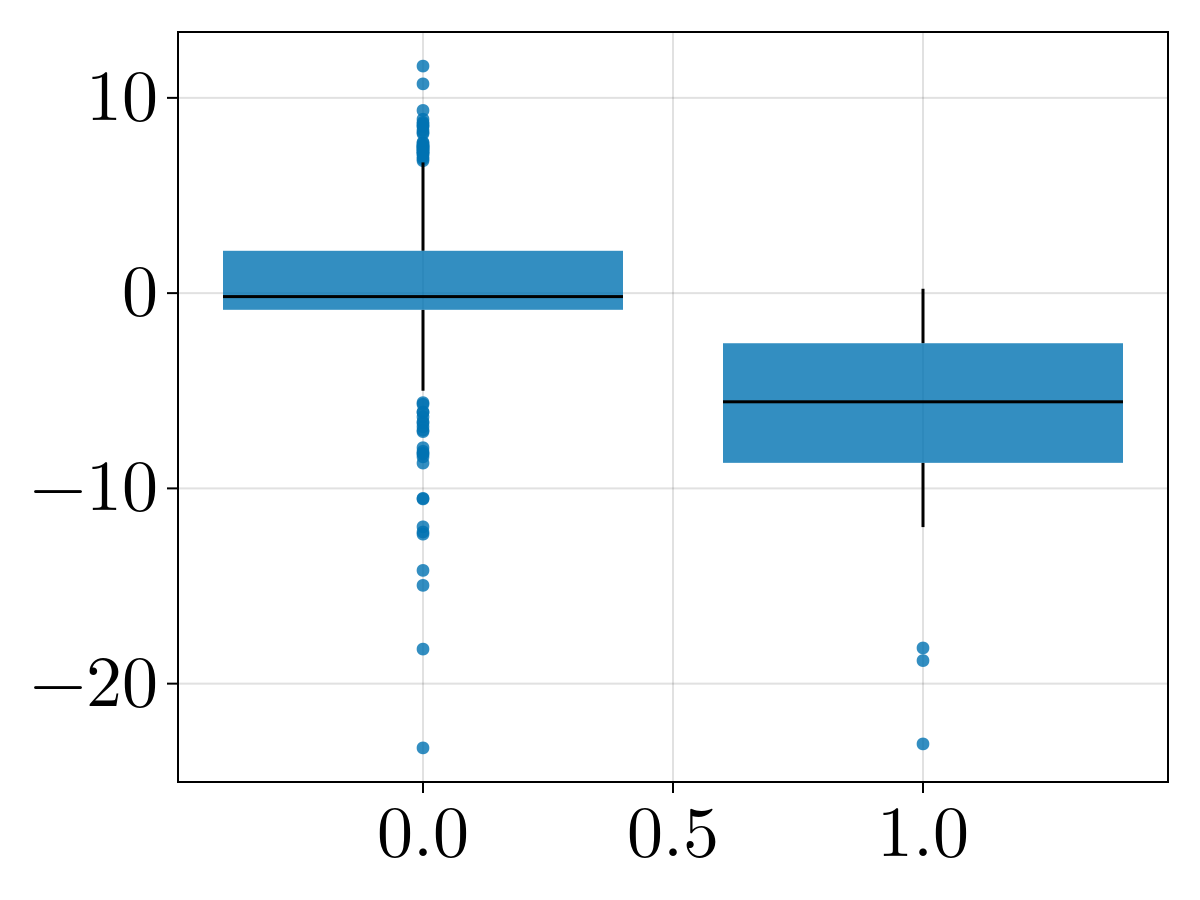

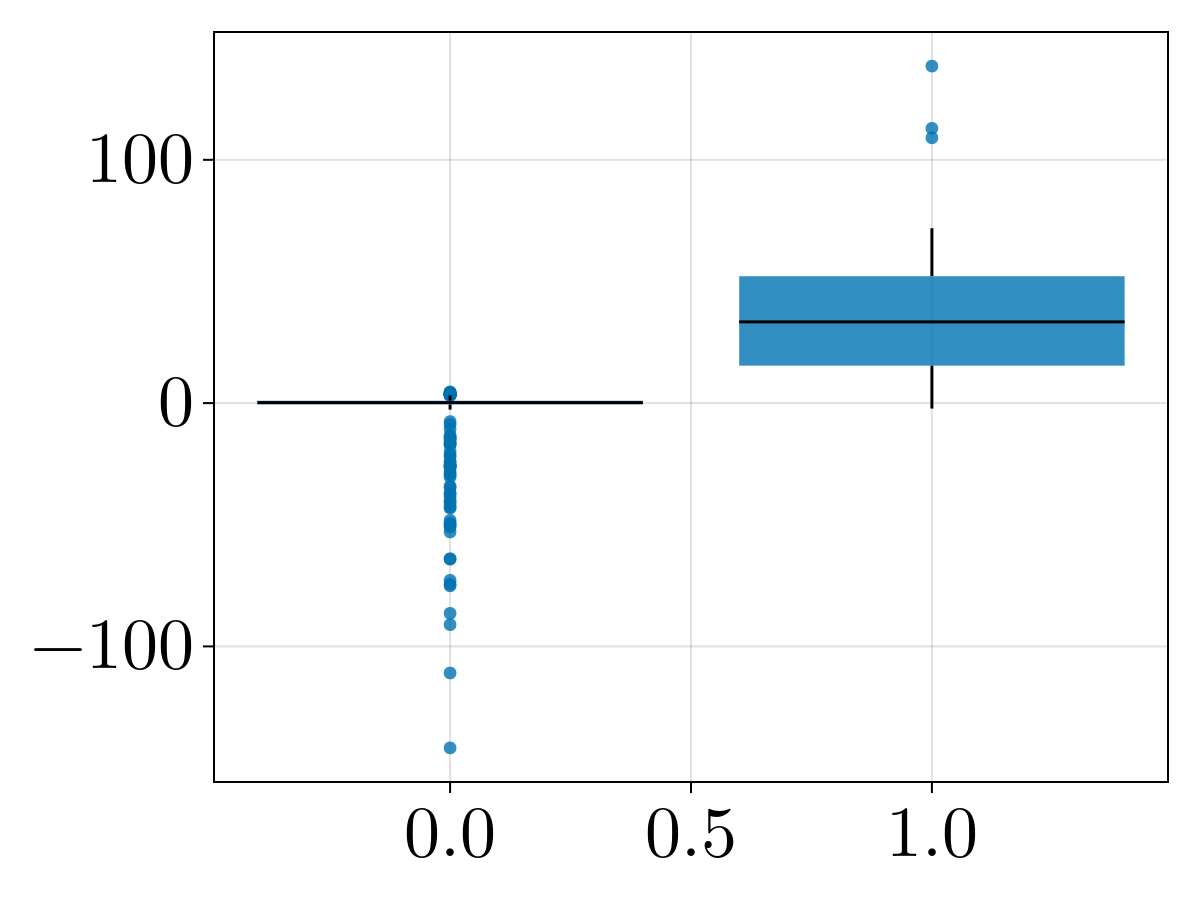

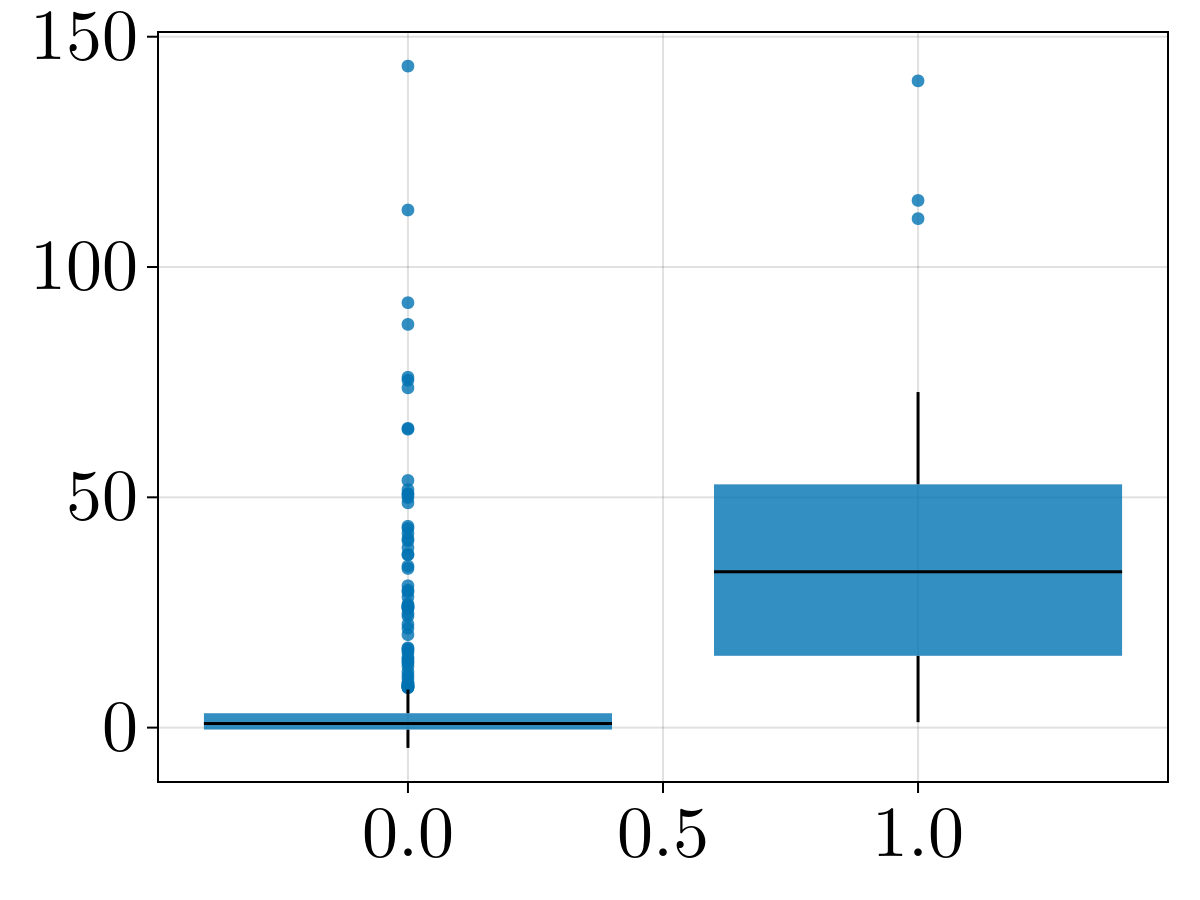

CairoMakie.Screen{IMAGE}


In [82]:
# neurons_infl_in_range = vec(-0.5 .< -trainedNN.b ./ trainedNN.w .< 0.5)
neurons_infl_in_range = vec(1/6-1/12 .< -trainedNN.b ./ trainedNN.w .< 1/6+1/12)
neurons_infl_outside_range = neurons_infl_in_range .== 0

# filtered_data = trainedNN.b[vec(-2 .< -trainedNN.b ./ trainedNN.w .< 2)]

# boxplot(ones(size(filtered_data)), filtered_data)
boxplot(neurons_infl_in_range, trainedNN.b) |> display 
boxplot(neurons_infl_in_range, vec(trainedNN.w)) |> display 
boxplot(neurons_infl_in_range, trainedNN.a) |> display 

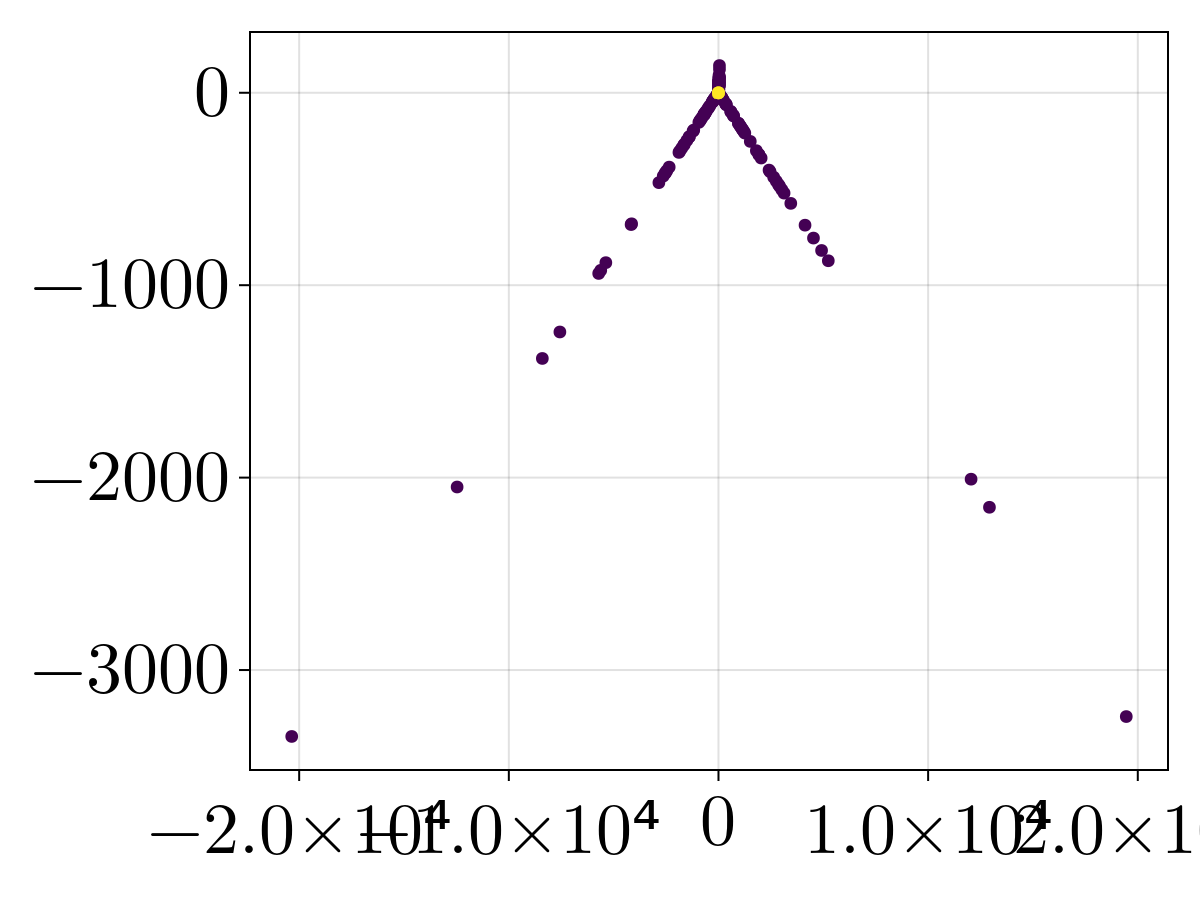

In [89]:
w_with_a = abs.(trainedNN.a) .* vec(trainedNN.w)
b_with_a = abs.(trainedNN.a) .* trainedNN.b
outputsigns = trainedNN.a .|> signbit

scatter(w_with_a, b_with_a, color=outputsigns)